# Table of contents:
## 1. Setup
## 2. Preprocessing
## 3. Elbow technique
## 4. kmeans clustering

# 1. Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl


In [2]:
#define path for data import
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [3]:
#hiding warnings from kmeans library
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import df
df = pd.read_pickle(os.path.join(path, "df2015_2019_dropped_2.pkl"))

In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


# 2. Preprocessing

In [6]:
#removing categorical columns
df_new = df.drop(columns = ["Country", "Region", "Happiness Rank", "Year"])
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
152,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
153,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
154,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [7]:
#standardizing values
df_std = StandardScaler().fit_transform(df_new)
df_std

array([[ 1.9590975 ,  1.1902624 ,  0.8213533 , ...,  1.66190312,
         2.77999643,  0.63775257],
       [ 1.93604603,  0.95768946,  0.9811718 , ...,  1.42149625,
         0.15247537,  1.77645673],
       [ 1.90590181,  1.01487588,  0.85491155, ...,  1.55613716,
         3.3821937 ,  1.00184082],
       ...,
       [-1.92773392, -1.39376893, -1.70236635, ..., -2.68612948,
        -0.94684855, -0.49491202],
       [-2.0341253 , -2.19378627, -3.26963047, ..., -1.21625053,
        -0.85244547,  0.13352993],
       [-2.23804209, -1.50241326, -1.52654174, ..., -2.62080152,
        -0.32378819, -0.13580233]])

# 3. Elbow technique

In [8]:
# define potential range of clusters:
num_cl = range(1,10)
kmeans = [KMeans (n_clusters = i) for i in num_cl]

In [9]:
#apply kmeans algorithm:
score = [kmeans[i].fit(df_std).score(df_std) for i in range (len(kmeans))]

In [10]:
score

[-5445.999999999999,
 -3575.2106220233327,
 -2702.502960019968,
 -2392.3545410829765,
 -2145.91011378514,
 -1984.4188456528389,
 -1871.7489192673356,
 -1777.0323396285064,
 -1714.1634089916924]

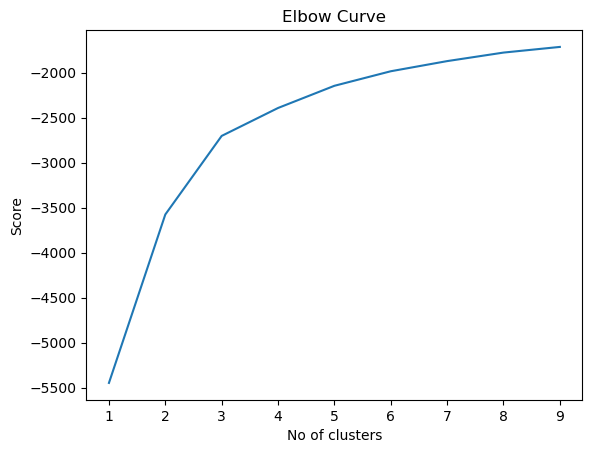

In [11]:
#visualize score
pl.plot (num_cl, score)
pl.xlabel ("No of clusters")
pl.ylabel ("Score")
pl.title ("Elbow Curve")
pl.show()

3 seems to be a good amount of clusters, as the curve begins to flatten right after. 4 could be an option as well.

# 4. kmeans clustering

In [12]:
#create kmeans object
kmeans = KMeans (n_clusters = 3)

In [13]:
#fit data
kmeans.fit(df_std)

KMeans(n_clusters=3)

In [14]:
# adding clusters column to the original df, since adding it to the df_std won't work due to its array nature.
df["clusters"] = kmeans.fit_predict(df_std)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,clusters
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1


In [15]:
df["clusters"].value_counts()

2    396
0    257
1    125
Name: clusters, dtype: int64

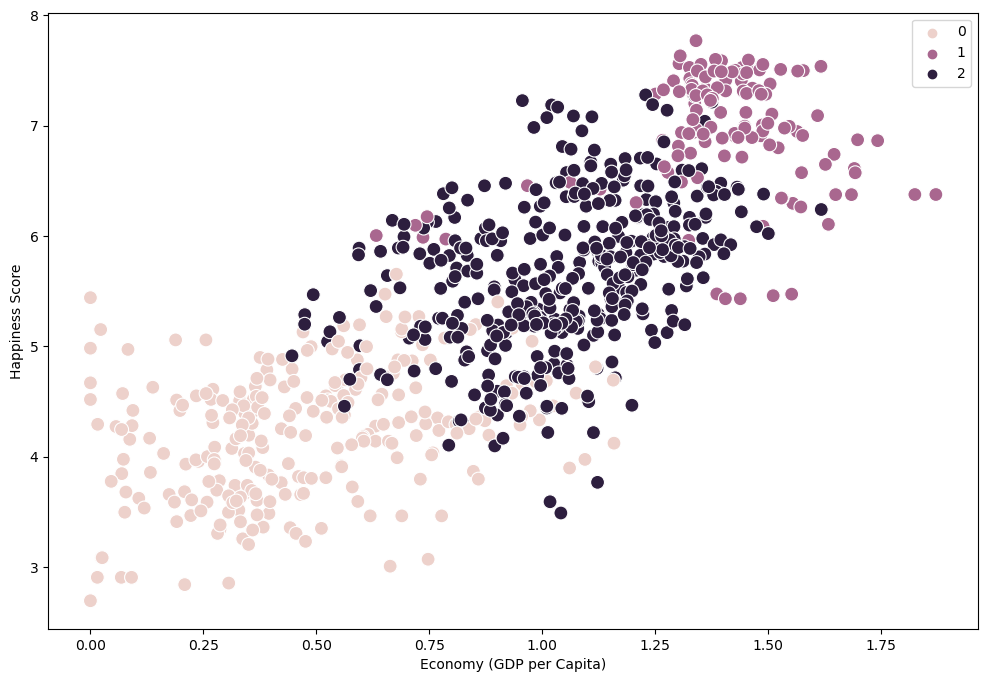

In [16]:
#create visualization for Economy x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Economy (GDP per Capita)"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation:
The dark purple cluster shows that data points with higher Happiness scores are mostly those with the highest Economy scores as well. The pink cluster encompasses those with low Happiness scores and the lowest Economy scores, slightly overlapping with the data points of the purple cluster. The purple cluster indicates a middle ground between the dark purple and pink clusters, with data points between moderate Happiness scores and moderate Economy scores. These observations make sense in term that having financial stability also equals to being more content.

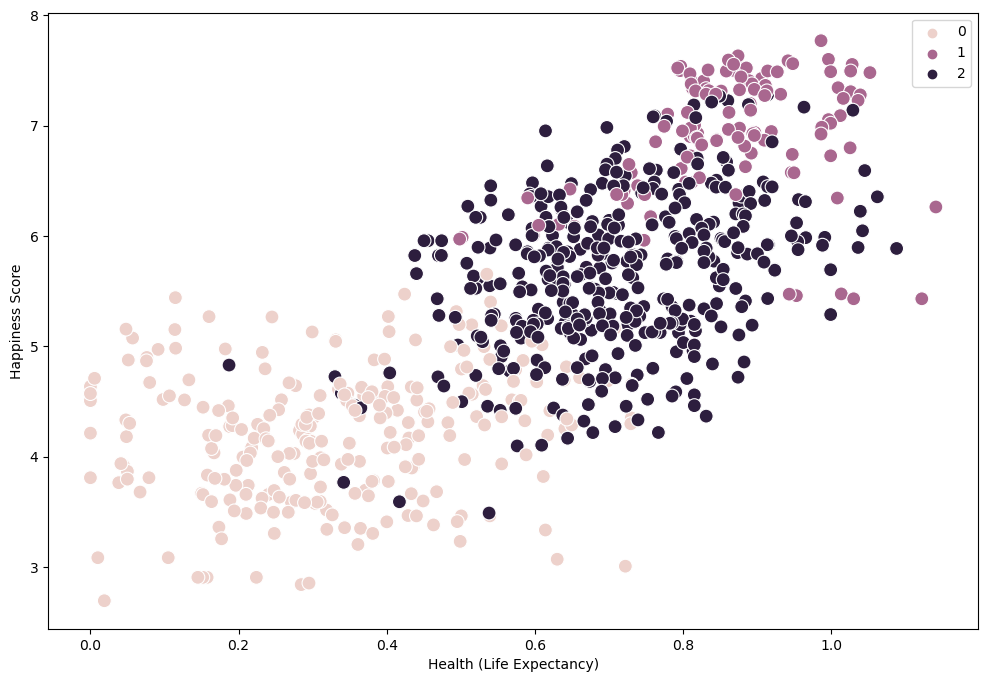

In [17]:
#create visualization for Health x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Health (Life Expectancy)"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation
The dark purple cluster contains data points with the highest Happiness scores and the highest Health scores. The pink cluster contains the lowest Happiness scores and the majority of the lowest Health scores. This indicates that people might feel happier once the Healthcare system in a country reaches a certain standard. The purple cluster once again is a middle ground between the dark purple and the pink clusters, although some of its data points with Happiness score and Health score resemble those of the dark purple cluster. These observations make sense as well, since having the security of living a healthy life also ensure happiness.

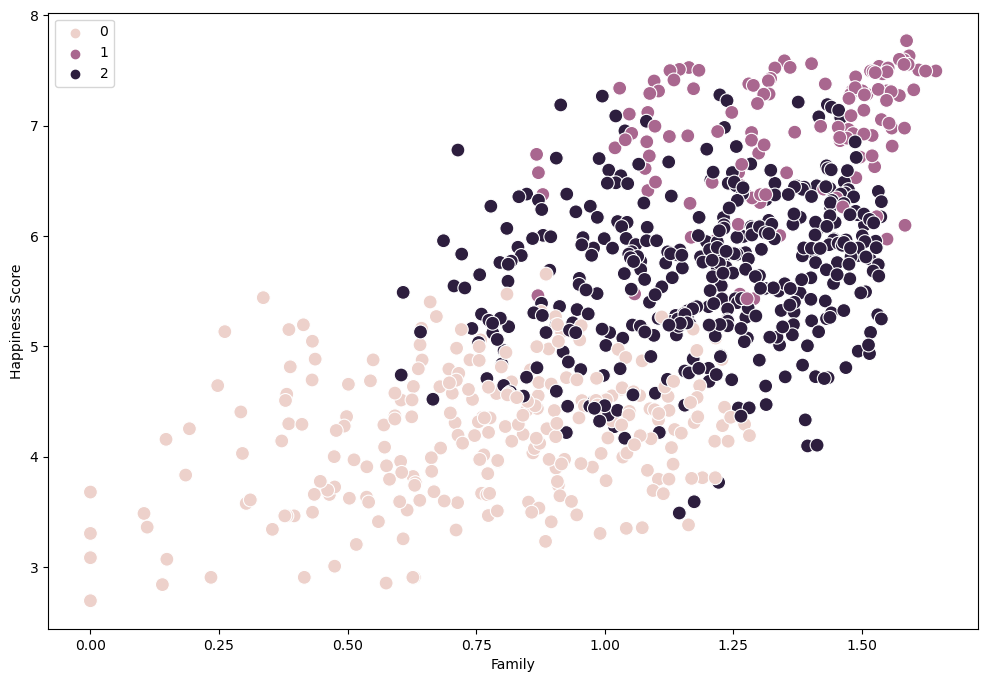

In [18]:
#create visualization for Family x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Family"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation
Once again, the dark purple cluster contains the highest Happiness scores overlapping with the highest Family scores. The pink cluster contains the majority of data points with lower Happiness scores with the lowest Family scores, while the purple cluster is inbetween. This also makes sense, since a greater stability in the family leads to bigger happiness as well.

This leads me to the conclusion that the Happiest people might be those with the highest securities in those 3 terms: Economy, Health and Family.

In [19]:
# summary statistics
df_new.loc[df["clusters"] == 2, "cluster"] = "dark purple"
df_new.loc[df["clusters"] == 1, "cluster"] = "purple"
df_new.loc[df["clusters"] == 0, "cluster"] = "pink"

In [20]:
df_new.groupby("cluster").agg({"Happiness Score":["mean", "median"],
                              "Economy (GDP per Capita)":["mean", "median"],
                              "Health (Life Expectancy)": ["mean", "median"],
                              "Family": ["mean", "median"]})

Happiness Score        Economy (GDP per Capita)            \
                       mean median                     mean    median   
cluster                                                                 
dark purple        5.642015  5.694                 1.047822  1.055849   
pink               4.210879  4.280                 0.471016  0.438013   
purple             6.936920  6.985                 1.403716  1.405980   

            Health (Life Expectancy)              Family            
                                mean    median      mean    median  
cluster                                                             
dark purple                 0.710114  0.703735  1.194015  1.223965  
pink                        0.338274  0.331080  0.768226  0.792000  
purple                      0.861746  0.867330  1.350889  1.360580

The dark purple cluster contains the "best" overall values, having the highest values for all 4 variables that I looked at. The pink cluster is the group of data points with the lowest overall values, and the purple cluster contains datapoints on the middle ground. This shows the pattern of having higher overall Economy, Health and Family values leads to higher Happiness scores.

### Proposal:
These findings confirm my hypothesis of having overall highly rated values results in higher happiness score. I could try to transfer the grouping of data points to regression analysis of these different clusters and try to predict the Happiness scores once more.

In [45]:
# summary statistics
df.loc[df["clusters"] == 2, "cluster"] = "dark purple"
df.loc[df["clusters"] == 1, "cluster"] = "purple"
df.loc[df["clusters"] == 0, "cluster"] = "pink"
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,clusters,cluster
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1,purple
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1,purple
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1,purple
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,1,purple
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,1,purple


In [47]:
#Exporting df_new to csv for added cluster column.
df.to_csv(os.path.join(path, "df15_19_clustered.csv"))

# Bonus: Running regression on subgroups

The idea behind this is to separate the clusters by color and to perfom a regression on each cluster color. This is to find out whether isolating the subgroups will yield in improved predictability.

In [21]:
df_new["cluster"].value_counts()

dark purple    396
pink           257
purple         125
Name: cluster, dtype: int64

In [22]:
# separating dark purple cluster as dataset to train model
dp_df = df_new.loc[df_new["cluster"] == "dark purple"]
dp_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,dark purple
11,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,dark purple
13,7.187,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,dark purple
15,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,dark purple
22,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,dark purple
...,...,...,...,...,...,...,...,...
125,4.437,1.04300,0.98000,0.57400,0.24100,0.08900,0.14800,dark purple
129,4.366,0.94900,1.26500,0.83100,0.47000,0.04700,0.24400,dark purple
132,4.332,0.82000,1.39000,0.73900,0.17800,0.01000,0.18700,dark purple
136,4.166,0.91300,1.03900,0.64400,0.24100,0.06700,0.07600,dark purple


In [23]:
#reshaping X and Y to array shapes
X = dp_df[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom"]].values.reshape(-1, 4)

In [24]:
X

array([[1.22857, 1.22393, 0.91387, 0.41319],
       [0.95578, 1.23788, 0.86027, 0.63376],
       [1.02054, 0.91451, 0.81444, 0.48181],
       ...,
       [0.82   , 1.39   , 0.739  , 0.178  ],
       [0.913  , 1.039  , 0.644  , 0.241  ],
       [1.041  , 1.145  , 0.538  , 0.455  ]])

In [25]:
y = dp_df["Happiness Score"].values.reshape(-1, 1)

In [26]:
#import necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [28]:
#create regression object
regression = LinearRegression()

In [29]:
#fit train set to regression set
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
#create y_predict using X_test
y_predict = regression.predict(X_test)

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [32]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.16562791 0.01238918 1.09525255 2.13912078]]
Mean squared error:  0.3762147119567834
R2 score:  0.2805494320762598


In [33]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,4.456,5.164104
1,6.253,5.462314
2,6.293,6.160388
3,4.788,5.063301
4,4.949,4.782799
5,5.432,5.733668
6,5.093,5.522963
7,4.885,5.761207
8,3.488,5.527592
9,6.149,5.717660


### Result:
Performing a regression on the dark purple cluster did not yield better predictability compared to the whole dataset.

## Testing pink cluster

In [34]:
# separating dark purple cluster as dataset to train model
p_df = df_new.loc[df_new["cluster"] == "pink"]
p_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
77,5.268,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,pink
80,5.194,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,pink
84,5.129,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,pink
90,5.057,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,pink
91,5.013,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,pink
...,...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,pink
152,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,pink
153,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,pink
154,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,pink


In [35]:
#reshaping X and Y to array shapes
X = p_df[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom"]].values.reshape(-1, 4)

In [36]:
y = p_df["Happiness Score"].values.reshape(-1, 1)

In [37]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [38]:
#create regression object
regression2 = LinearRegression()

In [39]:
#fit train set to regression set
regression2.fit(X_train, y_train)

LinearRegression()

In [40]:
#create y_predict using X_test
y_predict = regression2.predict(X_test)

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [42]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.59760906 0.42340567 0.32144463 0.87303747]]
Mean squared error:  0.21809047436668152
R2 score:  0.34346488958139


In [43]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,3.644,4.038849
1,4.459,4.633185
2,5.472,4.344215
3,4.073,4.029286
4,4.028,4.104745
5,3.964,4.136444
6,3.515,4.217439
7,4.286,4.293236
8,5.163,4.324835
9,4.535,4.431183


### Result:
Performing a regression on the pink purple cluster also did not yield better predictability compared to the whole dataset. Both instances may be due to lack of data rows. 